

# Project: Investigate a Dataset (tmdb movies data set)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

this project is part of a course with udacity, where I chose (Tmdb-movies) dataset to work with and analze the data set to clean and wrangle and find answers that could help lead to something helpful or answering something interesting such as :
1-what year had the most movies releases
2-What year had the most profits
3-what is the average of the length of the movies (runtime)



In [64]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [65]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()
#printed first rows to check the data 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [66]:
# checking the name of cloumns that we have 
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [67]:
df.info()
# used info to check for NAN and check the data type 
#and we already can see that we have a lot of NaN
# so I'm gonna drop must of the columns that have NAN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [68]:
df.shape
# so we have 10866 movies 

(10866, 21)

In [69]:
df.duplicated().sum()
#from here we can see that we have duplicated row 

1

In [70]:
df.drop_duplicates(inplace=True)
#after running this code, the duplicated row will disappear 

here I'm going to drop the columns that I don't want or use 



### Data Cleaning (removing un wanted columns and NAN)

here I'm going to drop the columns that I don't want or use 

In [71]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# created a variable with the useless columns so I can drop them easier 
useless_col=['imdb_id','homepage','tagline','keywords','overview','production_companies','release_date','budget_adj','revenue_adj']

In [72]:
df.drop(useless_col,axis=1, inplace=True)
#here we dropped the useless columns 

In [73]:
df.head()
# and as we can see the useless columns are gone 

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


In [74]:
df.isnull().sum()
#so we can still see that we have some missing values, it's much lower than it was before 

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

here we gonna drop the NAN or the missing values 

In [75]:
df.dropna(inplace=True)
print(df.isnull().sum())

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64


we don't see any missing values anymore so now the data is cleaned :)

In [76]:
df.info()
#taking last look for the data set information before start analyzing them 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   vote_count      10731 non-null  int64  
 10  vote_average    10731 non-null  float64
 11  release_year    10731 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

after we cleaned the data set and we got rid off the missing values and useless columns, now we can start exploring the data with creating visulaization or some statistics to see them and understand some points about the data we gonna work with.



In [77]:
# here I'm gonna show some statistics for the columns that we have 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10731.000000,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000,10731.000000,10731.000000
mean,65201.741869,0.652615,1.480365e+07,4.031989e+07,102.468829,219.812972,5.964710,2001.259622
std,91470.508056,1.004804,3.106456e+07,1.176524e+08,30.493873,578.815324,0.930283,12.820151
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10547.500000,0.210765,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20323.000000,0.387081,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000
75%,73948.500000,0.720889,1.600000e+07,2.500000e+07,112.000000,148.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


here we can see there is zeros in the revenue and the budget so we have to fix it 

In [78]:
df[(df['budget']==0)].shape[0]

5578

In [79]:
df[(df['revenue']==0)].shape[0]

5888

In [80]:
df['revenue'].replace(0, np.NAN, inplace=True)

In [81]:
df['budget'].replace(0, np.NAN, inplace=True)

In [82]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10731.000000,10731.000000,5.153000e+03,4.843000e+03,10731.000000,10731.000000,10731.000000,10731.000000
mean,65201.741869,0.652615,3.082824e+07,8.933981e+07,102.468829,219.812972,5.964710,2001.259622
std,91470.508056,1.004804,3.893199e+07,1.621546e+08,30.493873,578.815324,0.930283,12.820151
min,5.000000,0.000188,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10547.500000,0.210765,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000
50%,20323.000000,0.387081,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000
75%,73948.500000,0.720889,4.000000e+07,1.000000e+08,112.000000,148.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


1- we can see the popularity mean is 0.65 and the min is 0.00018 and the max is 32.98 , from the average we know there is an outlier 

2- from the release year the range of years is from 1960 to 2015 
and the average of release date is 2001 

3- imdp votes range is from 1 to 10 , and we can see it was from 1.5 to 9.2 and the average of votes was 5.97

In [83]:
# here I'm gonna create a new columns for the profit so we can put it in a chart and see how much was the profit for the movies
df['profit']= df['revenue']- df['budget']
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,2.284364e+08


In [84]:
# we want to know the percentage of profit for each movie in the data set 
df['profit_perc'] = (df['profit']/(df['revenue']+.001))*100
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,profit,profit_perc
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.363529e+09,90.089386
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,2.284364e+08,60.363216
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.852382e+08,62.741949
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.868178e+09,90.329654
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.316249e+09,87.385887


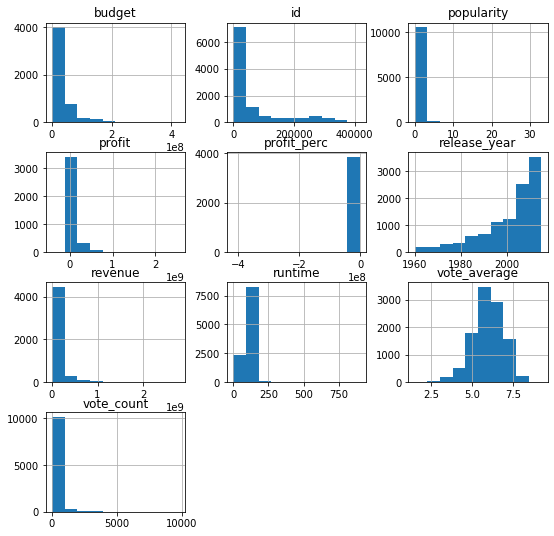

In [85]:
df.hist(figsize=(9,9));
#here is a quick look for the histogram of all the columns we have 

from the vote average histogram chart we know that it's normally distrubited 

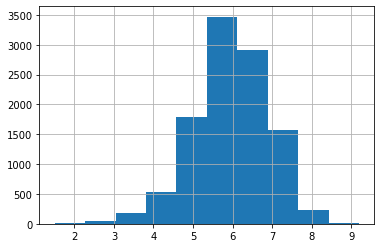

In [86]:
df['vote_average'].hist();

and as we can see in the next graph, how must of the movies had a great revenue comparing next to the budget 

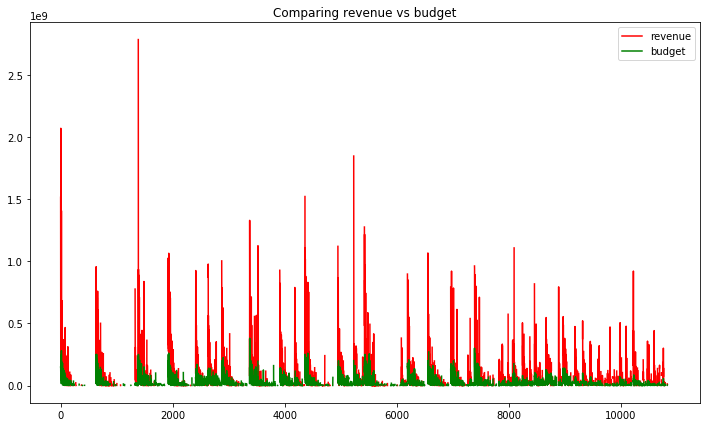

In [87]:
df['revenue'].plot(kind='line',color='r',label='revenue',figsize=(12,7))
df['budget'].plot(color='g',label='budget')
plt.title('Comparing revenue vs budget')
plt.legend();
#in this code we compare the budget with the revenue

###  Q1: what year had the most movies releases?

In [88]:
# so after cleaning the data and exploring them I'm gonna answer the first question simply using matplotlibrary 
most_release= df.groupby('release_year').count()['id']
most_release

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     38
1968     38
1969     30
1970     40
1971     55
1972     40
1973     55
1974     46
1975     44
1976     47
1977     56
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    104
1985    108
1986    120
1987    124
1988    142
1989    135
1990    132
1991    133
1992    132
1993    177
1994    184
1995    174
1996    203
1997    191
1998    210
1999    224
2000    224
2001    241
2002    264
2003    281
2004    307
2005    361
2006    404
2007    432
2008    486
2009    525
2010    475
2011    532
2012    574
2013    649
2014    682
2015    617
Name: id, dtype: int64

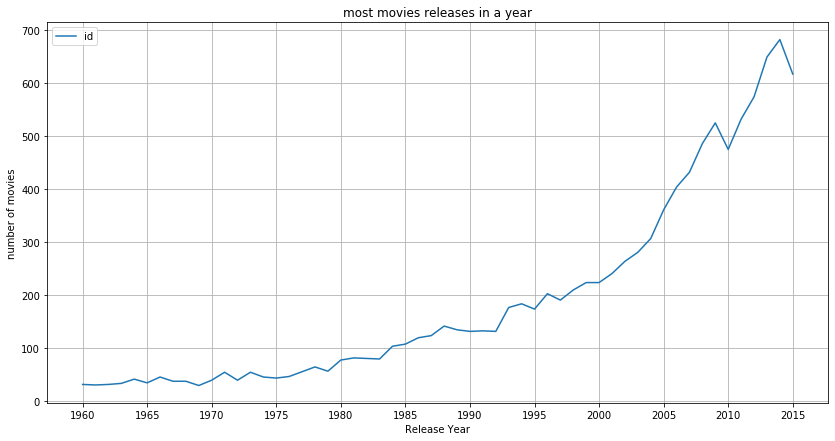

In [89]:
# from the previous code we already know that 2014 had the most releases but we want to see it in a plot or chart 
most_release.plot(xticks=np.arange(1960,2017,5), figsize=(14,7));
plt.xlabel('Release Year')
plt.ylabel('number of movies')
plt.title('most movies releases in a year')
plt.legend()
plt.grid()


from the previous plot and the output we can say that year 2014 had the most movie releases where it was 683 movies and after it was 2013 with 649 movies and 2015 with 617 movies, it was increasing from 2010 until 2014

## Q2 : What year had the most profits?

In [90]:
# here we created a profits variable the sums all the profits for each movie in that year 
profits = df.groupby('release_year')['profit'].sum()

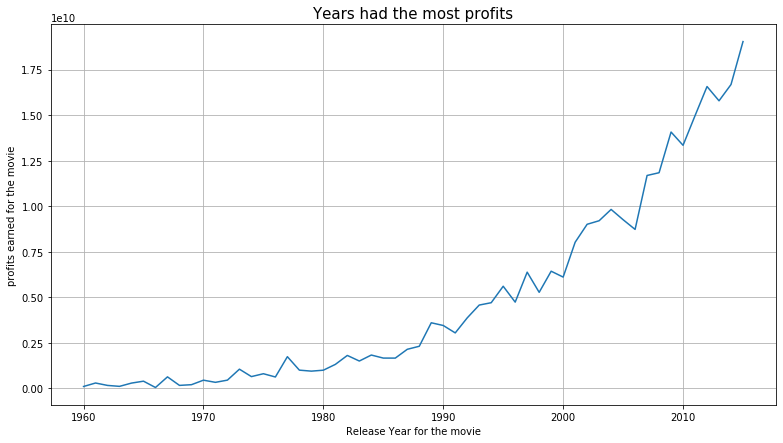

In [91]:

plt.figure(figsize=(13,7))
plt.plot(profits)
plt.xlabel('Release Year for the movie')
plt.ylabel('profits earned for the movie')
plt.title('Years had the most profits', fontsize=15)
plt.grid()
# we created a plot chart showing the line for the profits through out the years 

I used the plt.figure method by looking at this link at stack overflow 
https://stackoverflow.com/questions/38666527/what-is-the-necessity-of-plt-figure-in-matplotlib 

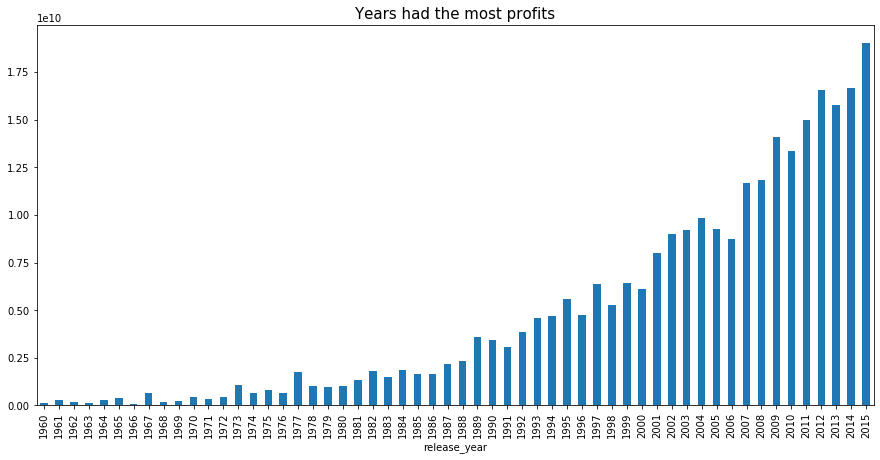

In [92]:
profits.plot(kind='bar', figsize=(15,7));
plt.title('Years had the most profits', fontsize=15);
# here just made another char just to have another prospective to the plots and understand them more 

 same answer but different chart, where we can see clearly that 2015 holds the most profits in that year after that comes 2012 


## Q3 : what is the average of the length of the movies (runtime)?

In [93]:
#first we calculate the mean for it using the following 
avg_run=df['runtime'].mean()
avg_run

102.46882862734135

so the average of the movies length is 102 minutes, we will create a char to visualize it better

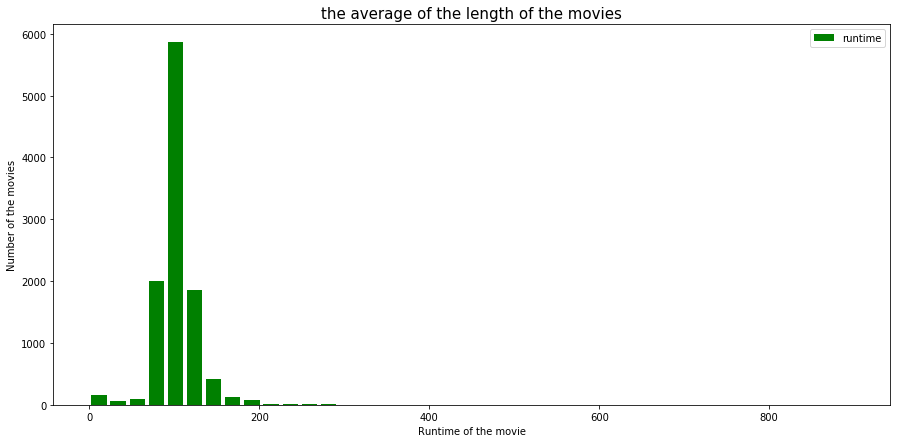

In [94]:
df['runtime'].plot(kind='hist',color='g',figsize=(15,7), bins=40, rwidth= 0.8)
plt.xlabel('Runtime of the movie')
plt.ylabel('Number of the movies')
plt.title('the average of the length of the movies', fontsize=15)
plt.legend();

from the previous histogram chart we can see that is most of the movies runtime 102 minutes and the range is between 90to 110 minutes running time

In [95]:
df['runtime'].describe()

count    10731.000000
mean       102.468829
std         30.493873
min          0.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

note that the median is 99 mins and the 75th quartile is 112 and the 25th quartile is 90 

## Q4 : finding the correlation between the revenue and budget

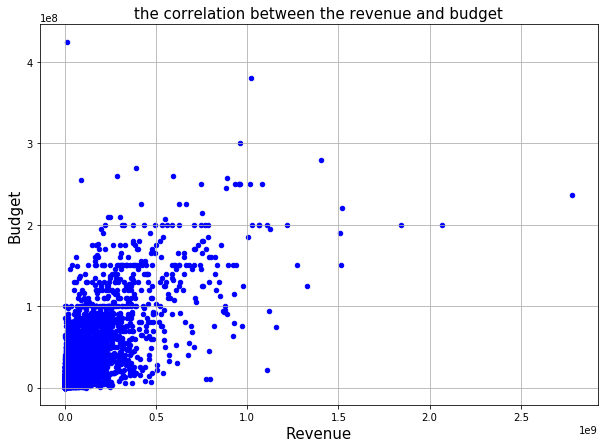

In [96]:
# in this code we made a scatter plot to take a look at the correlation between the two variable 
df.plot(kind='scatter',x='revenue',y='budget',color='b', figsize=(10,7))
plt.grid()
plt.xlabel('Revenue', fontsize= 15)
plt.ylabel('Budget', fontsize= 15);
plt.title('the correlation between the revenue and budget', fontsize=15);


In [97]:
df.corr()
#here is just a table of the correlation for all the data set and we only want to see the budget and the revenue

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit,profit_perc
id,1.000000,-0.009464,-0.075121,-0.040742,-0.083996,-0.032767,-0.071896,0.510385,0.003890,0.018586
popularity,-0.009464,1.000000,0.479252,0.629167,0.138278,0.800619,0.217906,0.093044,0.596080,0.019515
budget,-0.075121,0.479252,1.000000,0.688403,0.265000,0.579650,0.092873,0.216117,0.526660,0.018619
revenue,-0.040742,0.629167,0.688403,1.000000,0.237978,0.764041,0.207157,0.121659,0.979138,0.025711
runtime,-0.083996,0.138278,0.265000,0.237978,1.000000,0.164966,0.177276,-0.119286,0.220597,0.009461
vote_count,-0.032767,0.800619,0.579650,0.764041,0.164966,1.000000,0.260554,0.110317,0.728276,0.020709
vote_average,-0.071896,0.217906,0.092873,0.207157,0.177276,0.260554,1.000000,-0.127746,0.259503,0.004796
release_year,0.510385,0.093044,0.216117,0.121659,-0.119286,0.110317,-0.127746,1.000000,0.088069,0.012884
profit,0.003890,0.596080,0.526660,0.979138,0.220597,0.728276,0.259503,0.088069,1.000000,0.024918
profit_perc,0.018586,0.019515,0.018619,0.025711,0.009461,0.020709,0.004796,0.012884,0.024918,1.000000


from the graph and from the table we can see the correlation between the revenue and the budget is 0.734487 
the reveune does increases slightly at a high level but the movies with high budget the seem to be low and not a lot and they are rare, but there is a good chance that movies with with higer investments leads to better revenues

<a id='conclusions'></a>
## Conclusions

so finally after wrangling and cleaning the data set, we explored the data set and answerd some question that seemed to be intersting: 
Q1 : what year had the most movies releases?
and from the chart and the list we saw that 2014 had the most releases with over 682 movies that year and after that was 2013 with 649 movies, and we noticed there was increasing for the number of movies from 2010 to 2014 and from 2015 it decreased 
so the maximum number of movie releases was in year 2014 

Q2:What year had the most profits? 
we created two diffrenet visualizations in this question so I tried to make it clear in a many ways,but we can see that 2015 had the most profit, and after that comes 2012 in second with the most profit 

Q3: what is the average of the length of the movies (runtime)
we noticed the average was 102 minutes for each movie, and also we noticed the average runtime of the movies are decreasing every year
## Limitations 
I noticed there was a lot of null values at the start of analyzing the data set, which will make the data analysis is not accurate, also there was zeros in the revenue and budget column which dosen't make any sense to analyze

also the data was collected from TMDB, the value of popularity and votes is dependent on the users voting and looking around the TMDB website
I feel there is no more limitations 

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [98]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0